In [211]:
import numpy as np
import cv2
import os
from utils.utils import visualize
import matplotlib.pyplot as plt

In [212]:
data_dir = './result/'

In [213]:
imgs_list = []
for data in os.listdir(data_dir):
    if data[-4:] == ".jpg":
        img = cv2.imread(data_dir + data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs_list.append(img)

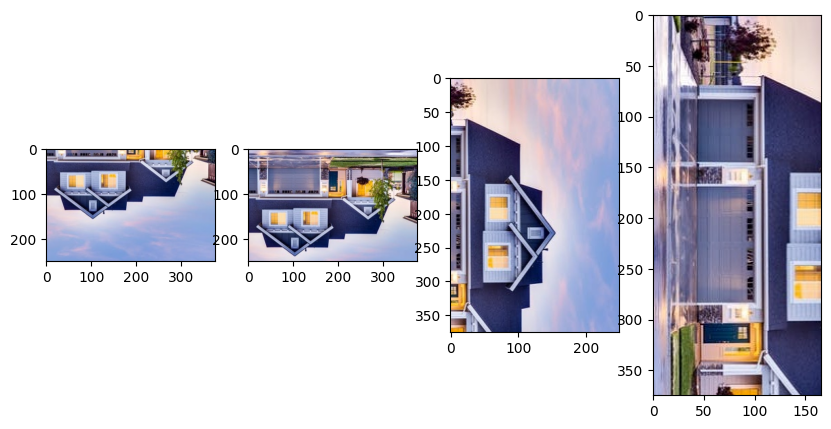

In [214]:
visualize(imgs_list)

In [215]:
imgs_list[0].shape

(249, 375, 3)

In [216]:
stitcher = cv2.Stitcher_create()
status, dst = stitcher.stitch(imgs_list)

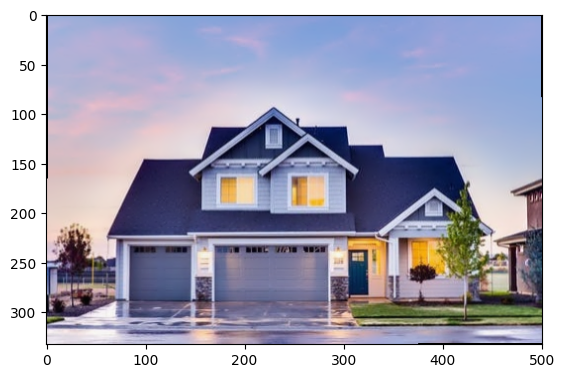

In [ ]:
plt.imshow(dst)

In [180]:
gray1 = cv2.cvtColor(imgs_list[0], cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(imgs_list[2], cv2.COLOR_BGR2GRAY)

In [ ]:
sift = cv2.SIFT_create()

In [181]:
# 특징점 검출 및 디스크립터 추출
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

print(f'img1 - {len(kp1)}features, img2 - {len(kp2)}features')

keypoints1 = np.float32([keypoint.pt for keypoint in kp1])
keypoints2 = np.float32([keypoint.pt for keypoint in kp2])

img1 - 364features, img2 - 450features


In [182]:
# 매칭
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

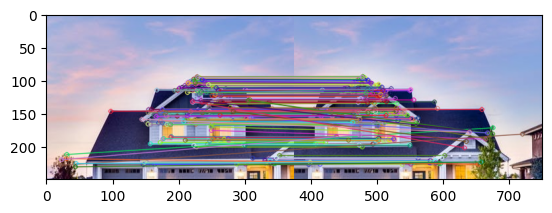

In [184]:
res = cv2.drawMatches(imgs_list[0], kp1, imgs_list[2], kp2, matches, None, \
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(res)

In [185]:
len(matches)

234

In [196]:
num_good_matches = 100
good_matches = matches[:num_good_matches]

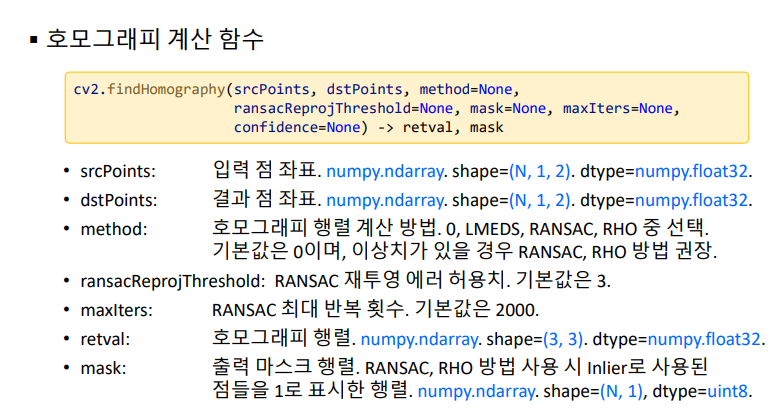

출처 : https://blog.naver.com/PostView.naver?blogId=engineerjkk&logNo=222263191204&parentCategoryNo=&categoryNo=30&viewDate=&isShowPopularPosts=true&from=search

In [197]:
# 매칭점 좌표 추출
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# 변환 행렬 계산
M, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0) # 최소 4개의 대응점 필요

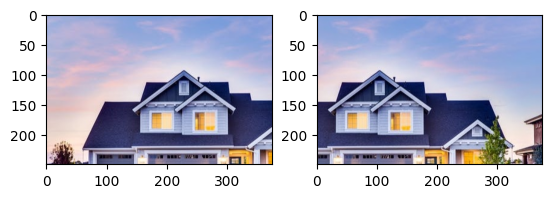

In [199]:
plt.subplot(1,2,1)
plt.imshow(imgs_list[0])
plt.subplot(1,2,2)
plt.imshow(imgs_list[2])